**BAN**-**210_NAA**

**Predictive** **Analytics**

***Workshop-5***

**Maaz Hussain**

***ID # 173714221***

**Professor: Dr. Savita Seharawat**

Question 1: Importing the dataset

First 5 rows of the dataset:
   age  job  marital  education  default  balance  housing  loan  contact  \
0   40    4        1          2        0     3036        1     0        2   
1   26    9        2          1        0      945        1     0        2   
2   15    2        1          1        0      918        1     1        2   
3   29    1        1          3        0     2420        1     0        2   
4   15   11        2          3        0      917        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    4      8       261         0      0         0         3  0  
1    4      8       151         0      0         0         3  0  
2    4      8        76         0      0         0         3  0  
3    4      8        92         0      0         0         3  0  
4    4      8       198         0      0         0         3  0  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211

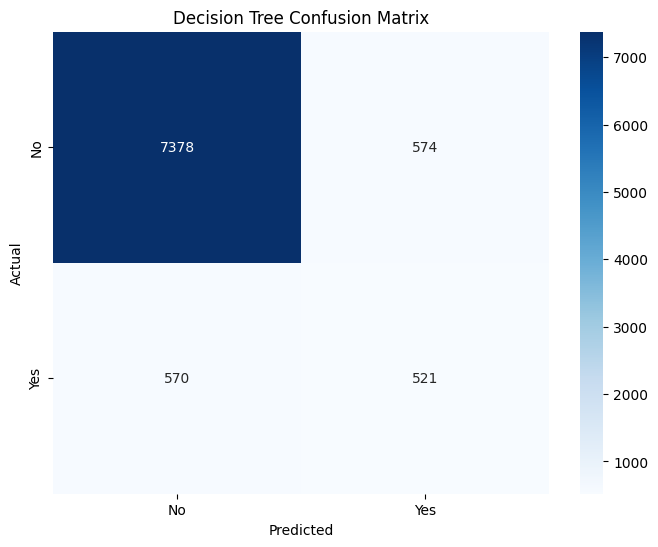


Logistic Regression Model:
Accuracy: 0.8874

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.58      0.24      0.34      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.61      0.64      9043
weighted avg       0.86      0.89      0.87      9043



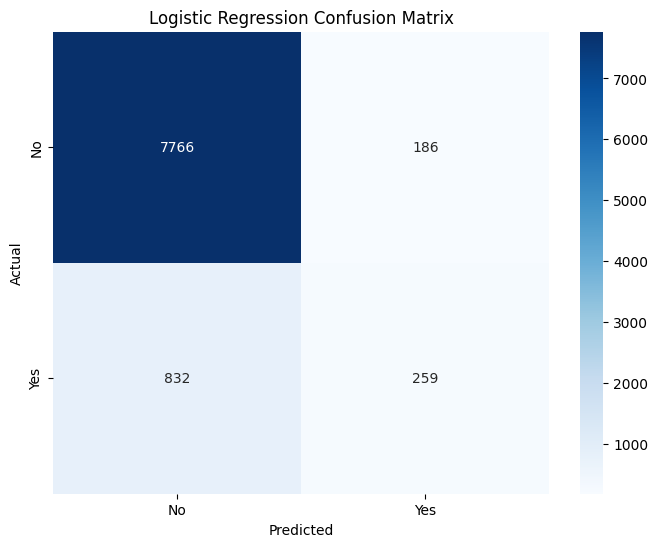


Model Performance Comparison:
Decision Tree Accuracy: 0.8735
Logistic Regression Accuracy: 0.8874
Better model: Logistic Regression


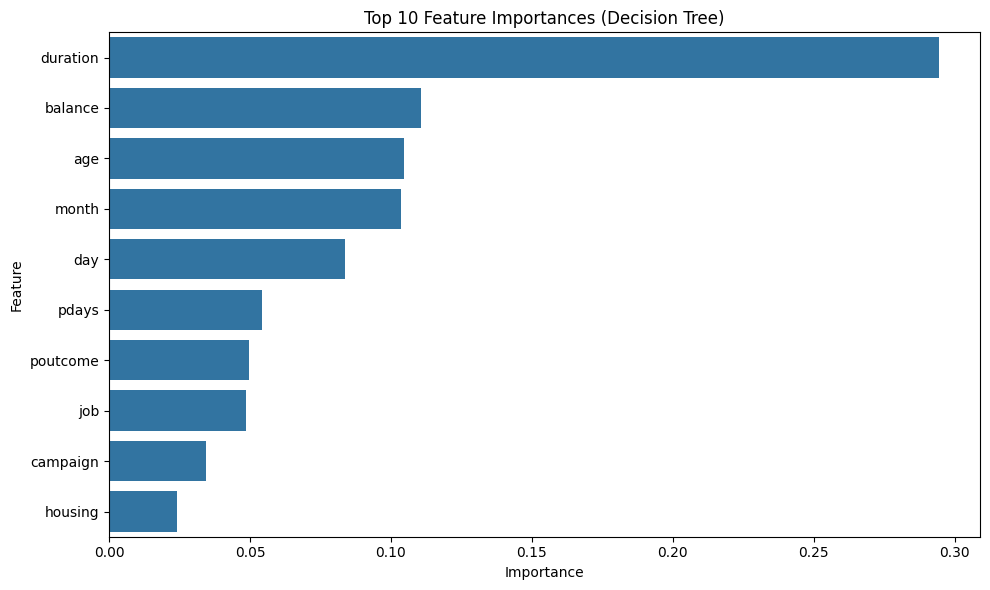

In [2]:
# Workshop 5 - Bank Client Data Analysis and Prediction
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Import the data set (1 point)
print("Question 1: Importing the dataset")
url = "https://raw.githubusercontent.com/jackty9/Handling_Imbalanced_Data_in_Python/master/bank-full-encoded.csv"
bank_data = pd.read_csv(url)

# Display the first few rows to verify the data was loaded correctly
print("\nFirst 5 rows of the dataset:")
print(bank_data.head())

# Display basic information about the dataset
print("\nDataset information:")
print(bank_data.info())

# 2. Print descriptive statistics (1 point)
print("\nQuestion 2: Descriptive statistics")
print(bank_data.describe())

# Check for missing values
print("\nMissing values in each column:")
print(bank_data.isnull().sum())

# 3. Splitting the Data-Set into Independent and Dependent Features (1 point)
print("\nQuestion 3: Splitting features and target")
X = bank_data.drop('y', axis=1)  # Independent variables (features)
y = bank_data['y']               # Dependent variable (target)

print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
print(f"Target value counts:\n{y.value_counts()}")

# 4. Convert categorical variables to numeric using one-hot encoding (1 point)
print("\nQuestion 4: One-hot encoding categorical variables")

# Identify categorical columns (assuming non-numeric columns are categorical)
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical columns: {categorical_cols}")
print(f"Numeric columns: {numeric_cols}")

# Create a column transformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ])

# Apply the transformations
X_encoded = preprocessor.fit_transform(X)

# Get the names of the encoded features
encoded_feature_names = numeric_cols.copy()
for cat_col in categorical_cols:
    categories = bank_data[cat_col].unique().tolist()
    # We dropped the first category for each variable (drop='first' in OneHotEncoder)
    encoded_feature_names.extend([f"{cat_col}_{cat}" for cat in categories[1:]])

print(f"Shape of data after one-hot encoding: {X_encoded.shape}")
print(f"Number of features after encoding: {X_encoded.shape[1]}")

# 5. Normalize the data set (1 point)
print("\nQuestion 5: Normalizing the dataset")
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_encoded)

print(f"Shape of normalized data: {X_normalized.shape}")
# Show the first few rows of normalized data
print("First 5 rows of normalized data (first 10 columns):")
print(X_normalized[:5, :10])

# 6. Divide the dataset to training and test sets (1 point)
print("\nQuestion 6: Splitting into training and test sets")
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# 7. Use Decision Tree and Logistic Regression to predict (1 point)
print("\nQuestion 7: Building and training models")

# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# 8. Evaluate model performance by computing Accuracy (1 point)
print("\nQuestion 8: Evaluating model performance")

# Decision Tree evaluation
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("\nDecision Tree Model:")
print(f"Accuracy: {dt_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, dt_predictions))

# Create and plot confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
dt_cm = confusion_matrix(y_test, dt_predictions)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Logistic Regression evaluation
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("\nLogistic Regression Model:")
print(f"Accuracy: {lr_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_predictions))

# Create and plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
lr_cm = confusion_matrix(y_test, lr_predictions)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Compare model performances
print("\nModel Performance Comparison:")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Better model: {'Decision Tree' if dt_accuracy > lr_accuracy else 'Logistic Regression'}")

# Optional: Feature importance for Decision Tree
if len(encoded_feature_names) == len(dt_model.feature_importances_):
    feature_importances = pd.DataFrame({
        'Feature': encoded_feature_names,
        'Importance': dt_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    # Plot top 10 important features
    plt.figure(figsize=(10, 6))
    top_features = feature_importances.head(10)
    sns.barplot(x='Importance', y='Feature', data=top_features)
    plt.title('Top 10 Feature Importances (Decision Tree)')
    plt.tight_layout()
    plt.show()
else:
    print("Feature names don't match model features. Skipping feature importance visualization.")